In [3]:
#install dependecies
!pip install kaggle 

In [5]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahil199","key":"3992af364b80d1dfce5bef6ce3fcdcdb"}'}

In [0]:
#
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset 

100% 2.69G/2.70G [00:28<00:00, 107MB/s] 
100% 2.70G/2.70G [00:28<00:00, 100MB/s]


In [9]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4533_180deg.JPG  
  inflating: new plant diseases dataset(augmented)/New

In [10]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# import os
num_classes = 38  # set the classes as the number of folder the data is divided
img_rows, img_cols = 128, 128    # set image height and breadth
batch_size = 32   # no. of data pass per process

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [12]:
# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [13]:
model = Sequential()

# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 64)       

In [79]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
from keras import layers
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 conv2d_1
1 activation_1
2 conv2d_2
3 activation_2
4 max_pooling2d_1
5 dropout_1
6 conv2d_3
7 activation_3
8 conv2d_4
9 activation_4
10 max_pooling2d_2
11 dropout_2
12 flatten_1
13 dense_1
14 activation_5
15 dropout_3
16 dense_2
17 activation_6


In [0]:
!mkdir hello

In [0]:
# initiate RMSprop optimizer and configure some parameters
# opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/hello/multi_plant_model.h5",               # provie the path to save the trainedd model. 
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]


In [18]:
# We use a very small learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 70295
nb_validation_samples = 17572
epochs = 1

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/1
2196/2196 [==============================] - 6221s 3s/step - loss: 2.1392 - accuracy: 0.3937 - val_loss: 0.2929 - val_accuracy: 0.7501

Epoch 00001: val_loss improved from inf to 0.29287, saving model to /content/hello/multi_plant_model.h5


In [0]:
#Confution Matrix and Classification Report in figure
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 128,128,3
model = load_model('/content/hello/multi_plant_model.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [0]:
nb_train_samples = 70295        # set as your total train images
nb_validation_samples = 17572    # set as your total valid images

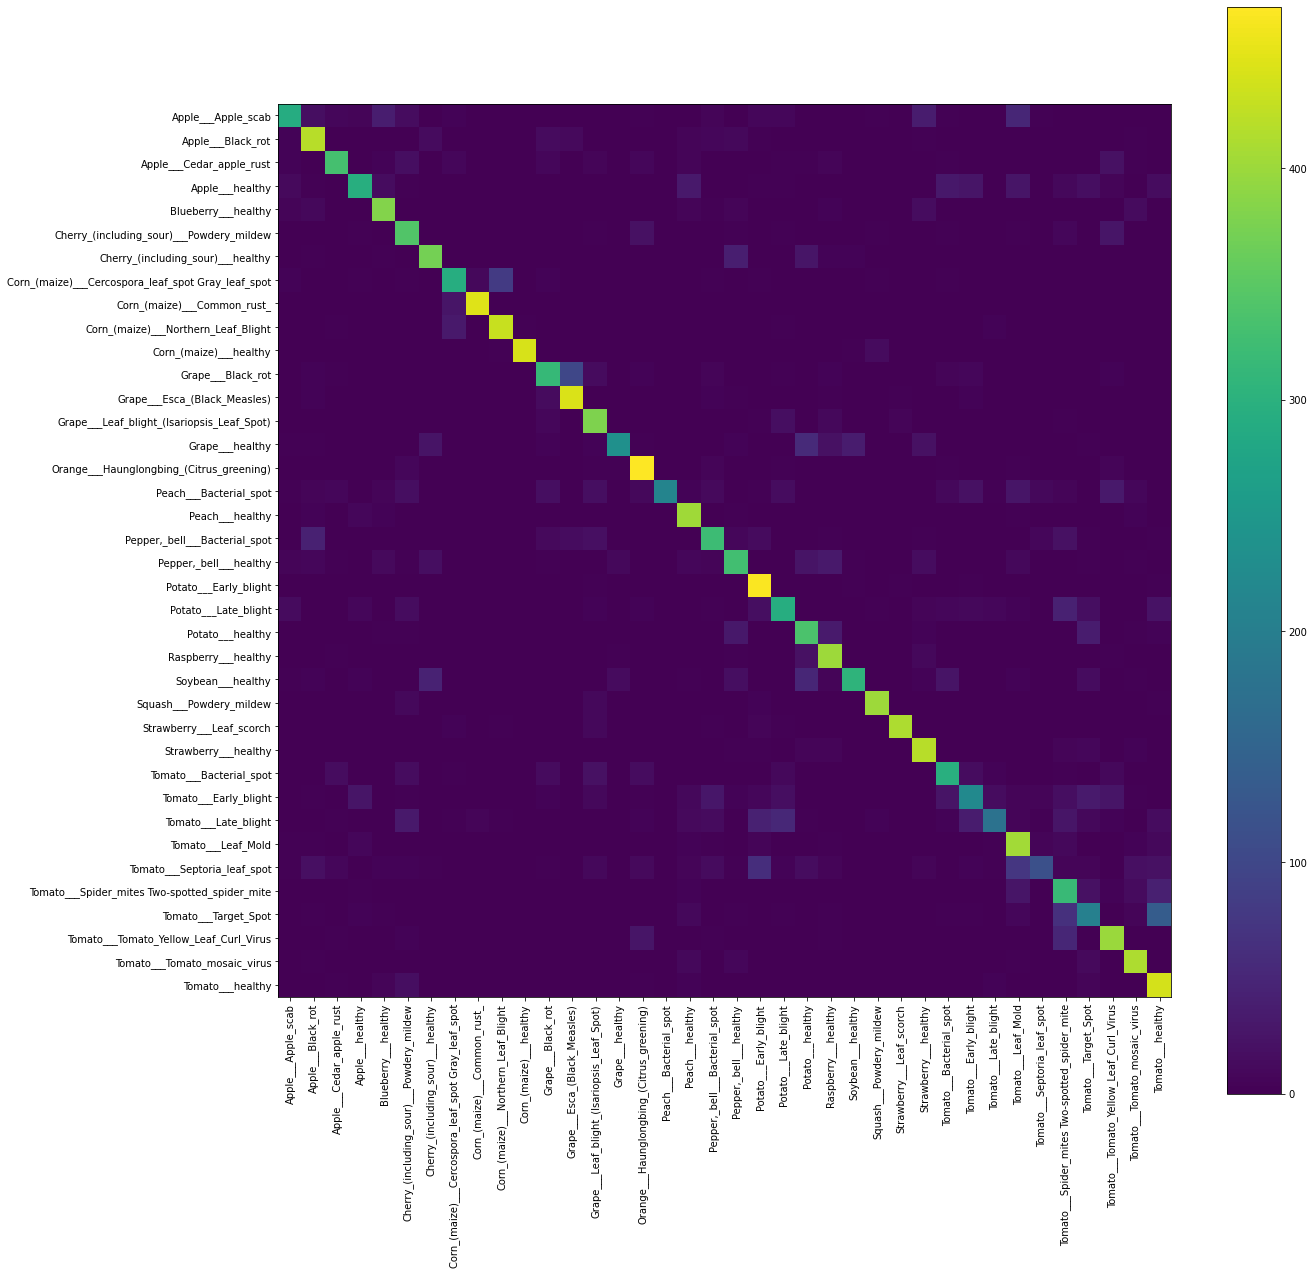

In [21]:
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [0]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib

In [23]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[291  17   8 ...   1   0   1]
 [  4 420   0 ...   0   2   0]
 [  4   0 332 ...  21   3   0]
 ...
 [  0   0   2 ... 400   0   0]
 [  0   2   1 ...   0 412   0]
 [  0   0   2 ...   0   0 440]]
Classification Report
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.81      0.58      0.67       504
                                 Apple___Black_rot       0.75      0.85      0.79       497
                          Apple___Cedar_apple_rust       0.84      0.75      0.80       440
                                   Apple___healthy       0.79      0.59      0.67       502
                               Blueberry___healthy       0.79      0.84      0.82       454
          Cherry_(including_sour)___Powdery_mildew       0.66      0.81      0.73       421
                 Cherry_(including_sour)___healthy       0.78      0.82      0.80       456
Corn_(maize)___Cercospora_leaf_s

In [0]:
class_dict = train_generator.class_indices
#print(class_dict)
li = list(class_dict.keys())
#print(li)

In [0]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/test/test/TomatoEarlyBlight1.JPG"
new_img = image.load_img(image_path, target_size=(128, 128))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

Following is our prediction:


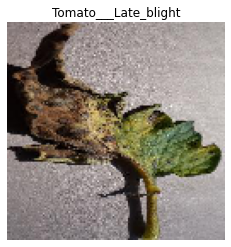

In [51]:
print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]


plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:


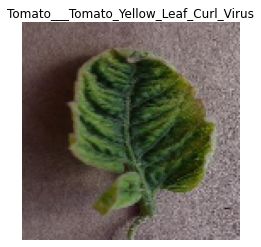

In [67]:
image_path = "/content/test/test/TomatoYellowCurlVirus2.JPG"
new_img = image.load_img(image_path, target_size=(128, 128))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]


plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:


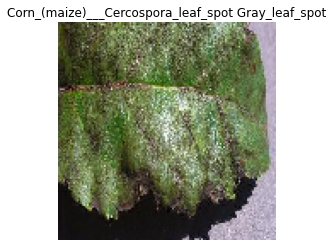

In [69]:
image_path = "/content/test/test/AppleScab3.JPG"
new_img = image.load_img(image_path, target_size=(128, 128))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]


plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:


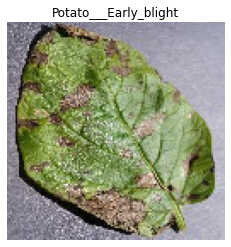

In [71]:
image_path = "/content/test/test/PotatoEarlyBlight1.JPG"
new_img = image.load_img(image_path, target_size=(128, 128))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]


plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [70]:
!ls

 hello					  new-plant-diseases-dataset.zip
 kaggle.json				  sample_data
'new plant diseases dataset(augmented)'   test
'New Plant Diseases Dataset(Augmented)'


In [32]:
!ls '/content/test/test'

AppleCedarRust1.JPG	PotatoEarlyBlight2.JPG	TomatoEarlyBlight6.JPG
AppleCedarRust2.JPG	PotatoEarlyBlight3.JPG	TomatoHealthy1.JPG
AppleCedarRust3.JPG	PotatoEarlyBlight4.JPG	TomatoHealthy2.JPG
AppleCedarRust4.JPG	PotatoEarlyBlight5.JPG	TomatoHealthy3.JPG
AppleScab1.JPG		PotatoHealthy1.JPG	TomatoHealthy4.JPG
AppleScab2.JPG		PotatoHealthy2.JPG	TomatoYellowCurlVirus1.JPG
AppleScab3.JPG		TomatoEarlyBlight1.JPG	TomatoYellowCurlVirus2.JPG
CornCommonRust1.JPG	TomatoEarlyBlight2.JPG	TomatoYellowCurlVirus3.JPG
CornCommonRust2.JPG	TomatoEarlyBlight3.JPG	TomatoYellowCurlVirus4.JPG
CornCommonRust3.JPG	TomatoEarlyBlight4.JPG	TomatoYellowCurlVirus5.JPG
PotatoEarlyBlight1.JPG	TomatoEarlyBlight5.JPG	TomatoYellowCurlVirus6.JPG
